In [50]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import cv2
from cv2 import xfeatures2d 
import math
import matplotlib as mplt
import shutil
import matplotlib.pyplot as plt
from PIL import Image

import os
import sys

In [ ]:
nrrd_path ="/home/braincenter5/Desktop/bouton/17302s/axon_test_11.18/negetive_axon_bouton"
tif_path="/home/braincenter5/Desktop/bouton/17302s/axon_test_11.18/ne_xy_tip/"           #project result of xy
tif_save_re="/home/braincenter5/Desktop/bouton/17302s/axon_test_11.18/ne_re_tip/"         #bouton around tip
tif_save_out="/home/braincenter5/Desktop/bouton/17302s/axon_test_11.18/ne_re_tip_out/"   #no bouton around tip
tif_save_no="/home/braincenter5/Desktop/bouton/17302s/axon_test_11.18/ne_re_tip_no/"    #no bouton in block
mip_dict = {'XY':0, 'XZ':1, 'YZ':2}

if os.listdir(tif_path):
    shutil.rmtree(tif_path) 
    os.mkdir(tif_path)
if os.listdir(tif_save_re):
    shutil.rmtree(tif_save_re) 
    os.mkdir(tif_save_re)
if os.listdir(tif_save_out):
    shutil.rmtree(tif_save_out) 
    os.mkdir(tif_save_out)
if os.listdir(tif_save_no):
    shutil.rmtree(tif_save_no)
    os.mkdir(tif_save_no)
def plot_mip(nrrd, ax=None, mip_direction='XY'):
    img = sitk.ReadImage(nrrd)
    #img = img.transpose(Image.ROTATE_180)
    array = sitk.GetArrayFromImage(img)
    mip = np.max(array, axis=mip_dict[mip_direction])

    if ax is None:
        plt.imshow(mip, cmap='Greys_r')
        plt.axis('off')
    else:
        ax.imshow(mip, cmap='Greys_r')
        ax.axis('off')
    return mip

In [366]:
def sift_tif(tif_path):
    img = cv2.imread(tif_path)
    #print(img.shape)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(0,3,0.04,30,1.6)
    keypoints, descriptor = sift.detectAndCompute(gray, None)
    return (keypoints,img)

In [369]:
cv2.xfeatures2d.SIFT_create?

Bouton around 34/156 tip is detected!
No bouton in 30 block is detected!
No bouton around 0 tip is detected!


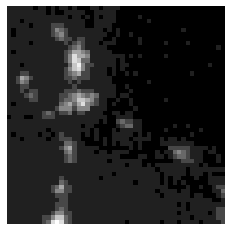

In [317]:
if __name__ == '__main__':
    #nrrd_path = sys.argv[1]
    #nrrd_path_save = sys.argv[2]
    if not nrrd_path.endswith("/"):
        nrrd_path = nrrd_path + '/'
        
    sample_list = sorted([i for i in os.listdir(nrrd_path) if i.endswith("tif")])
    for n_sample, nrrd in enumerate(sample_list):
        block_id = "_".join(nrrd.split("_")[2:6])
        mip = plot_mip(nrrd_path + nrrd, None,mip_direction='XY')
        cv2.imwrite(tif_path+nrrd,mip)
    
    count_tip=0
    count_block=0
    count_all_out=0
    tif_list = sorted([i for i in os.listdir(tif_path) if i.endswith("tif")])
    for n_sample, tif in enumerate(tif_list):
        keypoints,img=sift_tif(tif_path+tif) 
        img_out=img
        if len(keypoints)!=0:
            count_in=0
            count_out=0
            out=[]
            tip=[]
            for i in range(len(keypoints)):
                dis=math.sqrt((int(keypoints[i].pt[0])-25)**2+(int(keypoints[i].pt[1])-25)**2)
                if(dis<=7):
                    tip.append(i)
                    count_in+=1
                else:
                    out.append(i)
                    count_out+=1
            if (count_in!=0):
                #cv2.circle(img,(int(keypoints[min(tip)].pt[0]),int(keypoints[min(tip)].pt[1])),3,(0,255,0),1)
                cv2.imwrite(tif_save_re+tif,img)
                count_tip+=1 
            #if ((count_in==0) and (count_out!=0)):
            #    for i in out:
            #        cv2.circle(img,(int(keypoints[i].pt[0]),int(keypoints[i].pt[1])),3,(0,0,255),1)
            #    cv2.imwrite(tif_save_out+tif,img_out)
            #    count_all_out+=1
        else:
            cv2.imwrite(tif_save_no+tif,img)
            count_block+=1
    print("Bouton around %d/%d tip is detected!" % (count_tip,len(sample_list))) 
    print("No bouton in %d block is detected!" % count_block)
    print("No bouton around %d tip is detected!" % count_all_out)
    


# below is cutting 3D tif image in Z and using SIFT for bouton detection.

In [44]:
def sift_tif(tif_path):
    img = cv2.imread(tif_path)
    #print(img.shape)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(0,6,0.04,10,1)
    keypoints, descriptor = sift.detectAndCompute(gray, None)
    return (keypoints,img)

In [45]:
def cut_z_mip_sift(input_tif_path,cut_nums):  #input a tif folder
    
    tif_list=get_list(input_tif_path,".tif")
    for tifs in tif_list: #go through every tif
        
        
        list_name=tifs.split(".")
        del(list_name[-1])
        flag=str(".".join(list_name))
        #print(flag)
        tif_l1=input_tif_path+flag+"/"
        tif_l2_mip_cut=input_tif_path+flag+"/mip_cut/"
        tif_l2_sift_cut=input_tif_path+flag+"/sift_cut/"
        tif_l2_sift_all=input_tif_path+flag+"/sift_mip_all/"
    
        if os.path.exists(tif_l1):
            shutil.rmtree(tif_l1) 
            os.mkdir(tif_l1)
        else:
            os.mkdir(tif_l1)
        

        os.mkdir(tif_l2_mip_cut)
        os.mkdir(tif_l2_sift_cut)
        os.mkdir(tif_l2_sift_all)
            
        img = sitk.ReadImage(input_tif_path+tifs)
        
        img_array = np.array(sitk.GetArrayFromImage(img), dtype='int32')
        aver=np.mean(img_array)
        his=np.quantile(img_array, .99)
        #print(his,aver,img_array[50,50,50])
        
    
        #print(img_array.shape)
        #img_array = img_array.transpose(Image.ROTATE_180)
        #img_array.reverse()
       
       #mip and sift image with Z-cut
        index=0
        x=[]
        y=[]
        z=[]
        name=[]
        mip_dict={'XY':0,'XZ':1,'YZ':2}
        for i in range(int(img_array.shape[0] / cut_nums)):#go through every cut_tif
            img_cut = img_array[i*cut_nums:(i+1)*cut_nums,:,:]
            mip_cut = np.max(img_cut, axis=mip_dict['XY'])   
            flag_cut=str(i*cut_nums)+"_"+str((i+1)*cut_nums) #cut tif name
            cv2.imwrite(tif_l2_mip_cut+flag_cut+"_mip.tif",mip_cut)
            k_sift,img_sift=sift_tif(tif_l2_mip_cut+flag_cut+"_mip.tif")
           
            for j in range(len(k_sift)):#go through every keypoint
                if '%.2f' % k_sift[j].pt[0] not in x and '%.2f' % k_sift[j].pt[1] not in y:#make sure no dumplicated 
                    index=index+1
                    x.append('%.2f' % (k_sift[j].pt[0]+1))
                    y.append('%.2f' % ((img_array.shape[0]-float(k_sift[j].pt[1]))+1))#image about y=imagesize/2 symmetry
                    z.append((i+i+1)*cut_nums/2+1)
                    name.append(flag_cut)
                cv2.circle(img_sift,(int(k_sift[j].pt[0]),int(k_sift[j].pt[1])),3,(0,255,0),1)

            cv2.imwrite(tif_l2_sift_cut+flag_cut+"_sift.tif",img_sift)
            
        dataframe_csv = pd.DataFrame({'index':range(index),'x':x,'y':y,'z':z})
        dataframe_marker = pd.DataFrame({'##x':x,'y':y,'z':z,'radius':1,'shape':0,'name':name,'comment':0,
                                         'color_r':255,'color_g':0,'color_b':0})
        dataframe_marker.to_csv(input_tif_path+"/"+flag+"_keypoints.marker",index=False,sep=',')
        
        #mip and sift image with whole image  
        mip_all = np.max(img_array, axis=mip_dict['XY'])    
        cv2.imwrite(tif_l2_sift_all+"0_50_mip.tif",mip_all)
        k_sift,img_sift=sift_tif(tif_l2_sift_all+"0_50_mip.tif")
        for j in range(len(k_sift)):
            cv2.circle(img_sift,(int(k_sift[j].pt[0]),int(k_sift[j].pt[1])),3,(0,255,0),1)
        cv2.imwrite(tif_l2_sift_all+"0_50_sift.tif",img_sift)
            
    return 0


def cut_z_mip_one_img(img_array,cut_nums,save_path): #input a image array and a save path
       
    for i in range(int(img_array.shape[0] / cut_nums)):
        img_cut = img_array[i*cut_nums:(i+1)*cut_nums,:,:]
        mip_cut = np.max(img_cut, axis=mip_dict['XY'])    
        cv2.imwrite(save_path+str(i*cut_nums)+"_"+str((i+1)*cut_nums)+"_mip.tif",mip_cut)
        k_sift,img_sift=sift_tif(save_path+str(i*cut_nums)+"_"+str((i+1)*cut_nums)+"_mip.tif")
        for j in range(len(k_sift)):
            cv2.circle(img_sift,(int(k_sift[j].pt[0]),int(k_sift[j].pt[1])),3,(0,255,0),1)
        cv2.imwrite(save_path+str(i*cut_nums)+"_"+str((i+1)*cut_nums)+"_sift.tif",img_sift)
    return 0

def get_list_(tif_path,suffix):
    ct = 0
    tif_files = []
    for file in sorted(os.listdir(tif_path)):
        if file.endswith(suffix):
            ct += 1
            tif_files.append(file)
    print("%d tifs" % ct)
    return tif_files



In [46]:
input_tif_path="/home/braincenter5/Desktop/bouton_detection/for_allen/mouse17782-3487/"#input a tif folder
cut_z_mip_sift(input_tif_path,2)

3608 tifs


0

# below is calculating the distance for deleting dumplicated nodes

In [257]:
def refine_marker(marker_path,files,size):
    flag_x=(files.split("_x")[1]).split("_")[0]
    flag_y=(files.split("_y")[1]).split("_")[0]
    flag_z=(files.split("_z")[1]).split("_")[0]
    #x_ori=flag[0][1:]
    #y_ori=flag[1][1:]
    #z_ori=flag[2][1:]
    print('#ori_x:%s,ori_y:%s,ori_z:%s' % (flag_x,flag_y,flag_z))
    x_offset=float(flag_x)-size/2
    y_offset=float(flag_y)-size/2
    z_offset=float(flag_z)-size/2
    
    #result list
    x=[]
    y=[]
    z=[]
    
    #read markerfile
    data_marker=pd.read_csv(marker_path+"/"+files)
    if data_marker.empty:
        return 0,0,0
    
    #read swc file
    swc_name="_x"+flag_x+"_y"+flag_y+"_z"+flag_z
    data_swc=pd.read_csv(marker_path+"/"+'mouse17782_teraconvert_TeraSub'+swc_name+".swc",sep='/t',header=None)

    #delete nodes whose type != 2
    if len(data_swc)==0:
        return 0,0,0
    else:
        for i in reversed(range(len(data_swc))):
            prefix=str(data_swc.iloc[i][0])
            if prefix.startswith( "#" ):#exclude the title line
                data_swc=data_swc.drop([i]) 
            if len(prefix.split(' '))>2:
                if int(prefix.split(' ')[1])!=2:#exclude the nodes whose type!=2
                    data_swc=data_swc.drop([i])

    #delete dumplicated nodes
    x.append(data_marker.iloc[0][0])#put the fisrt node firstly
    y.append(data_marker.iloc[0][1])
    z.append(data_marker.iloc[0][2])
    for i in range(len(data_marker)):     
        #exclude nodes whose distance less than 3
        x1=data_marker.iloc[i][0]
        y1=data_marker.iloc[i][1]
        z1=data_marker.iloc[i][2]
        num1=0
        for j in range(len(x)):
            x2=x[j]
            y2=y[j]
            z2=z[j]
            dis=math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
            if dis<3:
                num1=num1+1
                break
                
        #exclude nodes 7piexls far away from swc nodes    
        drop=False
        if len(data_swc)!=0:
            num2=0
            for k in range(len(data_swc)):
                    prefix_for_cor=str(data_swc.iloc[k][0])
                    if len(prefix_for_cor.split(' '))>5:
                        x3=float(prefix_for_cor.split(' ')[2])
                        y3=float(prefix_for_cor.split(' ')[3])
                        z3=float(prefix_for_cor.split(' ')[4])
                        #print(x3,y3,z3)
                        dis_no=math.sqrt((x1-x3)**2+(y1-y3)**2+(z1-z3)**2)  
                        #print(dis_no)
                        if len(x)!=0:#calculate the first
                            dis_first=math.sqrt((float(x[0])-x3)**2+(float(y[0])-y3)**2+(float(z[0])-z3)**2)
                        if dis_first<7:
                            num2=num2+1
                        if num1==0 and dis_no<7:
                            x.append(x1)
                            y.append(y1)
                            z.append(z1)
                            drop=True
                            break
    
    if num2==0 and len(x)!=0:
        x.remove(x[0])
        y.remove(y[0])
        z.remove(z[0])
    dataframe_marker = pd.DataFrame({'##x':x,'y':y,'z':z,'radius':1,'shape':0,'name':0,'comment':0,
                                         'color_r':255,'color_g':0,'color_b':0})
    dataframe_marker.to_csv(marker_path+"/"+swc_name+"_refined2.marker",index=False,sep=',')
    #print(data_marker) 
    xr=['%.2f' % (float(i)+x_offset) for i in x]
    yr=['%.2f' % (float(i)+y_offset) for i in y]
    zr=['%.2f' % (float(i)+z_offset) for i in z]
    return xr,yr,zr
    

In [258]:
def get_list(tif_path,suffix):
    ct = 0
    tif_files = []
    for file in sorted(os.listdir(tif_path)):
        if file.endswith(suffix):
            ct += 1
            tif_files.append(file)
    print("%d tifs" % ct)
    return tif_files

In [259]:
#x,y,z=refine_marker('/home/braincenter5/Desktop/test22','RES(24275x37800x10955)_TeraSub_x27675_y12195_z5175_keypoints_shift2.marker',100)

In [260]:
def refine_marker_2terafly(marker_path,suffix):
    marker_list=get_list(marker_path,suffix)
    x=[]
    y=[]
    z=[]
    for num,files in enumerate(marker_list):
        print('#%d maker,name:%s' % (num,str(files)))
        x_marker,y_marker,z_marker=refine_marker(marker_path,files,100)
        if x_marker!=0 and y_marker!=0 and z_marker!=0:           
            x=x+x_marker
            y=y+y_marker
            z=z+z_marker
            print(len(x_marker),len(y_marker),len(z_marker))
    name=str("_".join(marker_list[0].split("_")[0:5]))
    dataframe_marker = pd.DataFrame({'##n':range(len(x)),'orderinfo':0,'name':0,'comment':0,'z':z,'x':x,'y':y,
                                     'pixmax':0,'intensity':0,'sdev':0,'volsize':0,'mass':0,
                                         'color_r':255,'color_g':0,'color_b':0})
    dataframe_marker.to_csv(marker_path+"/"+name+".apo",index=False,sep=',')
    
    return 0

In [262]:
refine_marker_2terafly('/home/braincenter5/Desktop/test22/ring_test/test_re','_shift3.marker')
#input markerfile folder and markerfile suffix

2 tifs
#0 maker,name:RES(28000x45000x11786)_TeraSub_x25245.000_y11115.000_z1845.000_keypoints_shift3.marker
#ori_x:25245.000,ori_y:11115.000,ori_z:1845.000
                             0
2    1 2 97.2 74.6 50.43 10 -1
3     2 2 95.3 74.7 50.14 10 1
4     3 2 93.4 74.8 49.89 10 2
5     4 2 91.5 74.7 49.69 10 3
6     5 2 89.6 74.4 49.44 10 4
7     6 2 87.8 73.8 49.19 10 5
8     7 2 86.1 72.9 48.98 10 6
9       8 2 84.5 72 48.81 10 7
10    9 2 83.1 70.8 48.63 10 8
11   10 2 81.9 69.4 48.46 10 9
12  11 2 80.9 67.8 48.32 10 10
13   12 2 79.9 66.2 48.2 10 11
14   13 2 78.9 64.7 48.1 10 12
15  14 2 77.6 63.3 48.01 10 13
16    15 2 76.3 62 47.93 10 14
17    16 2 74.8 61 47.84 10 15
18   17 2 73.1 60.2 47.7 10 16
19  18 2 71.3 59.6 47.62 10 17
20  19 2 69.4 59.3 47.56 10 18
21  20 2 67.4 59.1 47.53 10 19
22    21 2 65.5 59 47.59 10 20
23  22 2 63.5 58.9 47.73 10 21
24  23 2 61.5 58.9 47.87 10 22
25    24 2 59.5 59 47.96 10 23
26  25 2 57.5 59.1 48.05 10 24
27   26 2 55.5 59.3 48.2 10 25
28   27

/home/braincenter5/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


6 6 6
#1 maker,name:RES(28000x45000x11786)_TeraSub_x25335.000_y11115.000_z1845.000_keypoints_shift3.marker
#ori_x:25335.000,ori_y:11115.000,ori_z:1845.000
                             0
2    1 2 65.1 98.6 51.93 10 -1
3     2 2 64.1 96.9 51.91 10 1
4     3 2 63.2 95.2 51.94 10 2
5     4 2 62.3 93.5 51.97 10 3
6     5 2 61.3 91.8 51.97 10 4
7       6 2 60 90.4 51.97 10 5
8     7 2 58.6 89.2 51.97 10 6
9       8 2 57 88.1 51.96 10 7
10    9 2 55.4 87.1 51.93 10 8
11   10 2 53.6 86.2 51.88 10 9
12  11 2 51.9 85.4 51.83 10 10
13  12 2 50.1 84.5 51.76 10 11
14  13 2 48.4 83.6 51.71 10 12
15  14 2 46.7 82.6 51.72 10 13
16    15 2 45 81.6 51.74 10 14
17  16 2 43.2 80.8 51.78 10 15
18  17 2 41.5 80.1 51.81 10 16
19  18 2 39.8 79.5 51.83 10 17
20  19 2 38.1 78.9 51.85 10 18
21  20 2 36.4 78.4 51.87 10 19
22    21 2 34.8 78 51.91 10 20
23  22 2 33.1 77.5 51.91 10 21
24  23 2 31.5 77.1 51.89 10 22
25  24 2 29.8 76.7 51.86 10 23
26    25 2 28 76.3 51.83 10 24
27   26 2 26.1 76.1 51.8 10 25
28  27 2

0

# below is for evaluating the refinement using center signal peak(3D)

In [105]:
def get_intensity_3d_ring(img, x, y, z, r):
    if r==0:
        return img[z,y,x]
    #print(img[x,y,z])
    ct = 0
    intensity=0
    xa = max(int(x-0.5) - r, 0)
    xb = min(int(x-0.5) + r + 1, img.shape[0])
    ya = max(int(y-0.5) - r, 0)
    yb = min(int(y-0.5) + r + 1, img.shape[1])
    za = max(int(z-0.5) - r, 0)
    zb = min(int(z-0.5) + r + 1, img.shape[2])
    
    tp = np.zeros(img.shape)
    
    for i in range(xa, xb):
        for j in range(ya, yb):
            for k in range(za, zb):
                dist = np.sqrt((x-i)**2 + (y-j)**2 + (z-k)**2)
                if dist>r or dist<(r-1):
                    continue
                ct = ct + 1
                #print(img[k,j,i])
                intensity = intensity + img[k,j,i]
    #print(ct)
    if ct>0:
        intensity = intensity / ct
    return intensity

In [106]:
img = sitk.ReadImage('/home/braincenter5/Desktop/test22/ring_test/1111.tif')
img_array = np.array(sitk.GetArrayFromImage(img))
# data=img_array[:,60:80,:]
# img1 = sitk.GetImageFromArray(data)
# sitk.WriteImage(img1,'/home/braincenter5/Desktop/test22/ring_test/yyy.tif')
# PS:    #data=img_array[:,60:80,:] 
#        #x and z are normal,ya=100-y2,yb=100-y1;
#        #ya=60,yb=80;y1 and y2 are what you want in original image
print(img_array.shape)
ints=[]
for i in range(10):
    ins=get_intensity_3d_ring(img_array,72,100-24,86,i)
    ints.append(ins)
print(ints)

(100, 100, 100)
[32, 50.0, 35.03448275862069, 25.72043010752688, 20.795031055900623, 16.82758620689655, 15.093821510297483, 14.272552783109404, 13.657219973009447, 13.160621761658032]


In [2]:
#delete title line
swc=pd.read_csv('/home/braincenter5/Desktop/test22/ring_test/test_re',sep='/t',header=None)
for i in range(len(swc)):
    prefix=str(swc.iloc[i][0])
    if prefix.startswith( "#" ):
        continue
    #else:
    #    print(prefix.split(' ')[2])
#print(len(swc))
for i in reversed(range(len(swc))):
    #print(i,swc.iloc[i][0])
    prefix=str(swc.iloc[i][0])
    if prefix.startswith( "#" ):
        swc=swc.drop([i]) 
    if len(prefix.split(' '))>2:
        if int(prefix.split(' ')[1])!=2:#exclude the nodes whose type!=2
            swc=swc.drop([i])
#print(swc)

/home/braincenter5/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


# below is for evaluating the refinement using center signal peak(2D)

In [673]:
mip_dict={'XY':0,'XZ':1,'YZ':2}
def get_intensity_2d(img, x, y, r):
    if r==0:
        return img[x,y]
    ct = 0
    intensity=0
    #r = int(r+0.5)
    xa = max(int(x-0.5) - r, 0)
    xb = min(int(x-0.5) + r + 1, img.shape[0])
    ya = max(int(y-0.5) - r, 0)
    yb = min(int(y-0.5) + r + 1, img.shape[1])
    
    tp = np.zeros(img.shape)
    
    for i in range(xa, xb):
        for j in range(ya, yb):
            dist = np.sqrt((x-i)**2 + (y-j)**2)
            if dist>r:
                continue
            ct = ct + 1
            intensity = intensity + img[i,j]
    #print(ct)
    if ct>0:
        intensity = intensity / ct
    return intensity


def go_through_swc(swc_path,swc_name):
    swc=pd.read_csv(swc_path+'/'+swc_name,sep='/t',header=None)
    x=[]
    y=[]
    parent=[]
    for i in reversed(range(len(swc))):
    #print(i,swc.iloc[i][0])
        prefix=str(swc.iloc[i][0])
        if prefix.startswith( "#" ):#exclude the lines who startswith '#'
            continue
            #swc=swc.drop([i]) 
        if len(prefix.split(' '))>2:
            if int(prefix.split(' ')[1])!=2:#exclude the nodes whose type!=2
                continue
                #swc=swc.drop([i])
            else:
                x.append(float(prefix.split(' ')[2]))
                y.append(float(prefix.split(' ')[3]))
                parent.append(prefix.split(' ')[6])
    dataframe_swc = pd.DataFrame({'##n,':range(len(x)),'type,':2,'x,':x,'y,':y,'z,':0,'radius,':1,'parent':parent})
    dataframe_swc.to_csv(swc_path+"/"+swc_name+"_2D.swc",index=False,sep=' ')    
    y = [100-i for i in y] #y=100-y!!!
    return x,y #tere are the final x&y match with mip array iamge!


In [952]:
def vertical_line(swc_path,swc_name,image_size,line_half_length):
    swc=pd.read_csv(swc_path+'/'+swc_name,sep='/t',header=None)
    n_pn={}
    n_i={}
    num=0
    
    #get n_np and n_i
    for i in range(len(swc)):
        prefix=str(swc.iloc[i][0])
        if prefix.startswith( "#" ):#exclude the lines who startswith '#'
            continue 
        if len(prefix.split(' '))>2:
            if int(prefix.split(' ')[1])!=2:#exclude the nodes whose type!=2
                continue
            elif int(prefix.split(' ')[6])==-1:
                num=num-1 #change all root node to -1,-2,-3,-4...
                n_pn[int(prefix.split(' ')[0])]=num
                n_i[int(prefix.split(' ')[0])]=i
            elif int(prefix.split(' ')[6])!=-1:
                n_pn[int(prefix.split(' ')[0])]=int(prefix.split(' ')[6]) #dict n -> pn
                n_i[int(prefix.split(' ')[0])]=i #dict n -> i
   
    #find tips
    tip_n=[]           
    for key in n_pn:
        if key in n_pn.values():
            continue
        else:
            tip_n.append(key)
                        
    #go through from all tip nodes
    x_center=[]
    y_center=[]
    k=[]
    c=[]
    x_s=[]
    x_e=[]
    #x_line={}
    for tip in tip_n: #tip is tip's n;ii=n
        print('###N of tip nodes:%d' % tip)
        ii=tip
        while n_pn[ii] in n_pn.keys():
        
            prefix_i=str(swc.iloc[n_i[ii]][0])
            x1=float(prefix_i.split(' ')[2])
            y1=image_size-float(prefix_i.split(' ')[3]) #y=image_size-y
            x_center.append(x1)
            y_center.append(y1)
        
            if n_pn[ii] in n_pn:
                index=n_i[n_pn[ii]]
                prefix_i_1=str(swc.iloc[index][0])
                x2=float(prefix_i_1.split(' ')[2])
                y2=image_size-float(prefix_i_1.split(' ')[3])
                ki,ci=cal_vertical_lines(x1,y1,x2,y2)
                k.append(ki)
                c.append(ci)
                
                #calculate the x range of every line:b**2-4ac
                a_line=ki*ki+1
                b_line=2*(ki*ci-ki*y1-x1)
                c_line=x1*x1+y1*y1+ci*ci-2*y1*ci-line_half_length*line_half_length
                x11,x22=equation(a_line,b_line,c_line)
                x_s.append(x11)
                x_e.append(x22)
            #print(x1,y1,x2,y2)
            ii=n_pn[ii] 
            
        #calculate the x range of every line:b**2-4ac
        ki,ci=cal_vertical_lines(x2,y2,x1,y1)#use the last node when come to the root node
        a_line=ki*ki+1
        b_line=2*(ki*ci-ki*y2-x2)
        c_line=x2*x2+y2*y2+ci*ci-2*y2*ci-line_half_length*line_half_length
        x11,x22=equation(a_line,b_line,c_line)
        x_s.append(x11)
        x_e.append(x22)
        k.append(ki)
        c.append(ci)
        x_center.append(x2)
        y_center.append(y2)
                
    return k,c,x_s,x_e,x_center,y_center


In [953]:
import math
def equation(a,b,c):
    h=b*b-4*a*c
    if h>=0:
        x1=(-b+math.sqrt(h))/2/a  #sqrt函数求平方根
        x2=(-b-math.sqrt(h))/2/a
        x=x1
        x1=(x1 if x1>x2 else x2)
        x2=(x if x<x2 else x2)
        return(x1,x2)
    else:
        return 0,0

In [954]:
def cal_vertical_lines(x1,y1,x2,y2):
    if y1!=y2:
        k=(x1-x2) / (y2-y1) #(k*k1=-1,k1=-1/k)
        c=y1-k*x1
    else:
        k=0
        c=y1
    return k,c #vertical line:y=k*x+c

In [975]:
from pylab import plot
from pylab import title
def mip_plot(mip, x, y, k, c , xs, xe, ax=None, cmap='viridis'):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(mip, cmap=cmap)
    
    #plot(x,y,color='white',linewidth=0.5)
    plot(x,y,'r.',linewidth=0.5)# plot red nodes 
    for i in range(len(k)):
        xx=np.linspace(xs[i],xe[i])
        yy=list(xx*k[i]+c[i])
        xx=list(xx)
        for i in reversed(range(len(yy))):
            if yy[i]<0 or yy[i]>100 :
                del yy[i]
                del xx[i]
        plot(xx,yy,color='red',linewidth=1)#plot red vertical lines
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    return ax


In [1037]:
#calculate two nodes(x coordinates) of every line 
#away from center node with a distance:distance
#b**2-4ac;the center node is (x1,y1).
def resample(mip,xc,yc,k,c,max_distance):
    image_ints=[]
    x_distance=[]
    x_image=[]
    y_image=[]
    for distance in range(max_distance+1):
        a_line=k*k+1
        b_line=2*(k*c-k*yc-xc)
        c_line=xc*xc+yc*yc+c*c-2*yc*c-distance*distance
        x1,x2=equation(a_line,b_line,c_line)
        y1=k*x1+c
        y2=k*x2+c
        if distance==0:
            image_ints.append(mip[int(yc)][int(xc)])
            x_distance.append(0)
        if distance!=0 and 0<x1<(len(mip)-1) and 0<y1<(len(mip)-1) and 0<x2<(len(mip)-1) and 0<y2<(len(mip)-1):
            image_ints.append(mip[int(y1)][int(x1)])
            x_distance.append(distance)
                           
            image_ints.append(mip[int(y2)][int(x2)])
            x_distance.append(-distance)
            
            x_image.append(x1) #record all nodes in vertical line
            y_image.append(y1)
            x_image.append(x2)
            y_image.append(y2)
            #print(x1,y1,x2,y2)
            
    #df= pd.DataFrame({'image_ints':image_ints,'x_distance':x_distance})
    return image_ints,x_distance,x_image,y_image



In [1038]:
def plot_mip_lines(nrrd_path,k,c,xs,xe,xc,yc,max_distance):
    sample_list = sorted([i for i in os.listdir(nrrd_path) if i.endswith("mask.tif")])
    #plot mask_image and vertical line
    x=xc
    y=yc
    for n_sample, nrrd in enumerate(sample_list):
        img = sitk.ReadImage(nrrd_path+nrrd)
        array = sitk.GetArrayFromImage(img)
        mip = np.max(array, axis=mip_dict['XY'])
        #print(mip[37][55])#y and x.
        for i in range(len(k)):
            ints,dis,x_image,y_image=resample(mip,xc[i],yc[i],k[i],c[i],max_distance)
            #print(x_image,y_image)
            x=x_image+x
            y=y_image+y
        mip_plot(mip,x,y,k,c,xs,xe)#there are the final x&y match with mip!       
    return 0

In [1055]:
def plot_curves(nrrd_path,k,c,xs,xe,xc,yc,max_distance):
    sample_list = sorted([i for i in os.listdir(nrrd_path) if i.endswith("mask.tif")])

    #plot mask_image and vertical line
    for n_sample, nrrd in enumerate(sample_list):
        img = sitk.ReadImage(nrrd_path+nrrd)
        array = sitk.GetArrayFromImage(img)
        mip = np.max(array, axis=mip_dict['XY'])
    
    #plot the distribution of every vertical line
    all_ints=[]
    all_dis=[]
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    for i in range(len(k)):
        ints,dis,x_image,y_image=resample(mip,xc[i],yc[i],k[i],c[i],max_distance)
        dis,ints=(list(t) for t in zip(*sorted(zip(dis,ints))))#zip:sort list1 and list2 with the dis's order

        plot(dis,ints,'r.',linewidth=0.5)# plot red nodes 
        plot(dis,ints,color='red',linewidth=1)#plot red lines
        #print(i,dis,ints)
        all_ints=all_ints+ints
        all_dis=all_dis+dis
    ax.set_title('Intensity_distribution')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Intensity') 
    
    #plot the average distribution of all vertical line
    x_aver=[]
    y_aver=[]
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    dataframe_all = pd.DataFrame({'all_ints,':all_ints,'all_dist':all_dis})
    for i in range(-max_distance,max_distance+1):#-10 to 10
        x_aver.append(i) #-10 to 10
        y_aver.append(dataframe_all[dataframe_all.all_dist==i].mean().iloc[0]) #calculate the average of rows
        
    plot(x_aver,y_aver,'r.',linewidth=0.5)# plot red nodes 
    plot(x_aver,y_aver,color='red',linewidth=1)#plot red lines
    
    ax.set_title('Intensity_distribution')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Intensity') 
    
    return 0

In [1056]:
k,c,xs,xe,xc,yc=vertical_line('/home/braincenter5/Desktop/test22/ring_test/test_swc/swc','mouse17782_teraconvert_TeraSub_x32805.000_y17415.000_z3285.000.swc',100,10)
#print(cc,dd,xs,xe,xc,yc)

###N of tip nodes:54


/home/braincenter5/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


0

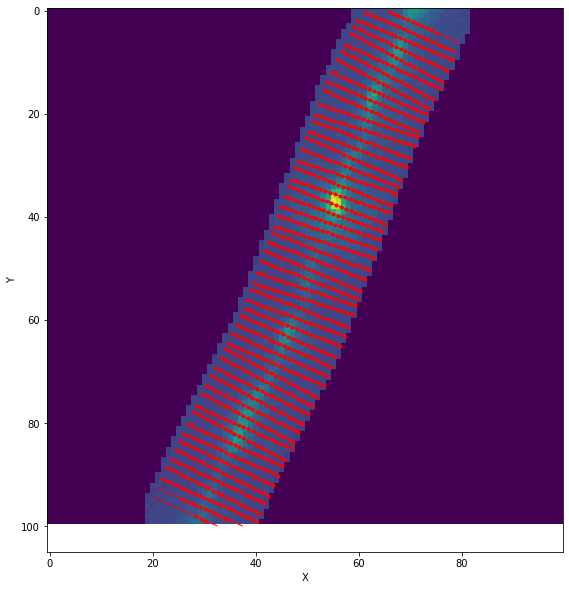

In [1057]:
plot_mip_lines('/home/braincenter5/Desktop/test22/ring_test/test_swc/swc/',k,c,xs,xe,xc,yc,10)

[-1, 0, 1] [26, 30, 28]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5] [20, 20, 20, 20, 24, 26, 24, 24, 22, 22, 20]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [16, 18, 18, 18, 18, 20, 18, 18, 22, 22, 28, 26, 22, 20, 20, 20, 18, 18, 18, 16, 18]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [18, 18, 18, 18, 18, 20, 20, 18, 20, 22, 32, 28, 22, 20, 18, 20, 20, 20, 18, 18, 18]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 24, 24, 20, 20, 20, 20, 18, 18, 18, 18, 18]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [18, 18, 18, 18, 18, 18, 18, 20, 20, 22, 24, 22, 20, 20, 20, 20, 20, 18, 18, 18, 18]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [18, 18, 18, 18, 18, 18, 20, 20, 20, 22, 26, 22, 22, 20, 20, 20, 20, 18, 18, 18, 16]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [18, 18, 18

0

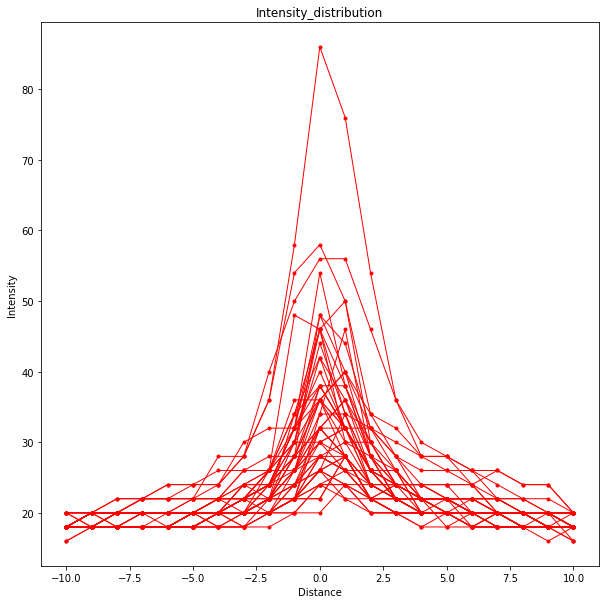

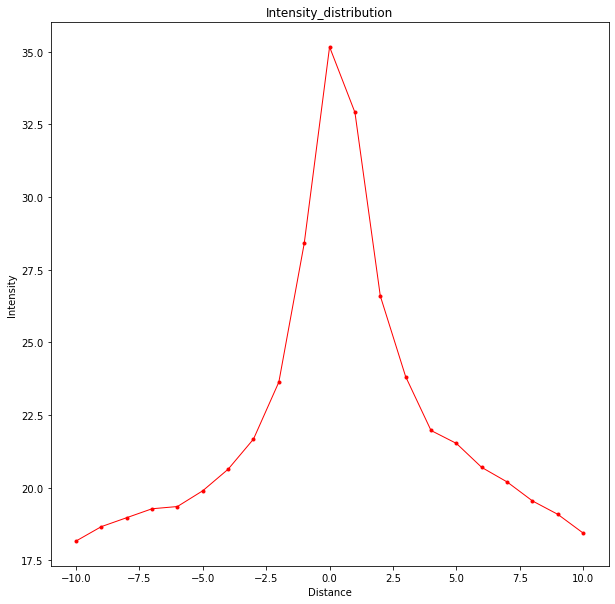

In [1058]:
plot_curves('/home/braincenter5/Desktop/test22/ring_test/test_swc/swc/',k,c,xs,xe,xc,yc,10)


In [1054]:
#a,b=go_through_swc('/home/braincenter5/Desktop/test22/ring_test/test_swc/swc','mouse17782_teraconvert_TeraSub_x32805.000_y17415.000_z3285.000.swc')